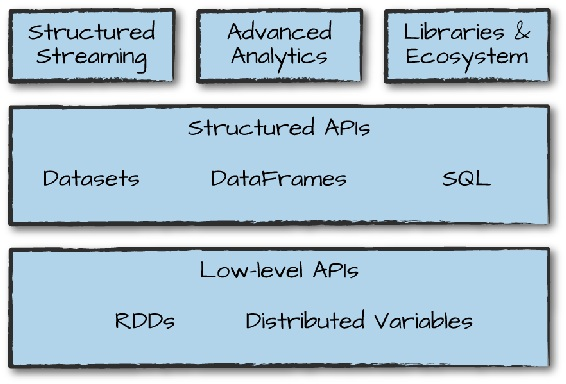

# Spark Applications Overview

A Spark Application consists of two main components:

* **Driver Process**
* **Executor Processes**

---

## Driver Process

The **driver process** runs your `main()` function and sits on a node in the cluster. It is responsible for three key tasks:

1. Maintaining information about the Spark Application.
2. Responding to user programs or inputs.
3. Analyzing, distributing, and scheduling work across the executors.

The driver is the **heart of a Spark Application** and maintains all relevant information for the lifetime of the application.

---

## Executor Processes

The **executors** carry out the actual work assigned by the driver. Each executor is responsible for:

1. Executing the code assigned by the driver.
2. Reporting the state of computation back to the driver node.

---

## Cluster Manager

The **cluster manager** controls the physical machines and allocates resources to Spark Applications. Spark supports three main cluster managers:

* Spark’s Standalone Cluster Manager
* YARN
* Mesos

This setup allows multiple Spark Applications to run on a cluster simultaneously.



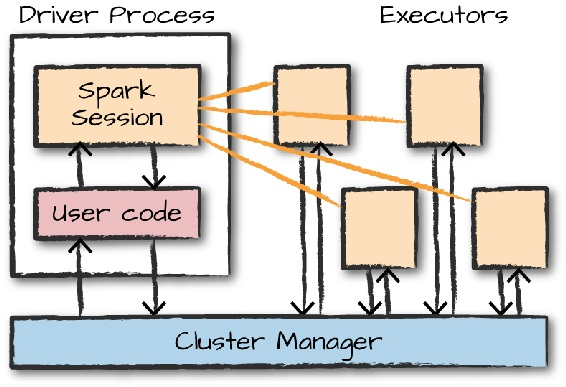

## Spark Language API

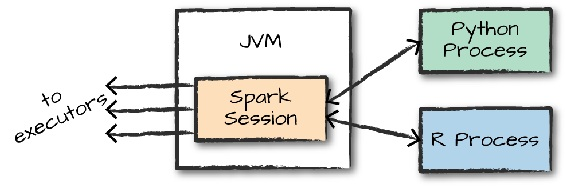

There is a SparkSession object available to the user, which is the
entrance point to running Spark code. When using Spark from Python or
R, you don’t write explicit JVM instructions; instead, you write Python
and R code that Spark translates into code that it then can run on the
executor JVMs.

# The SparkSession

The **SparkSession** is the entry point for controlling a Spark Application through the driver process.

A `SparkSession` instance is the mechanism by which Spark executes **user-defined manipulations** across the cluster.

---

## Key Points

* There is a **one-to-one correspondence** between a SparkSession and a Spark Application.
* In **Scala** and **Python**, when you start the Spark console, the `SparkSession` is automatically available as the variable `spark`.

---

## Example Usage

### Scala

```scala
val spark = SparkSession.builder()
  .appName("My Spark App")
  .getOrCreate()
```

### Python

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("My Spark App") \
    .getOrCreate()
```


# Dataframes And Partitions

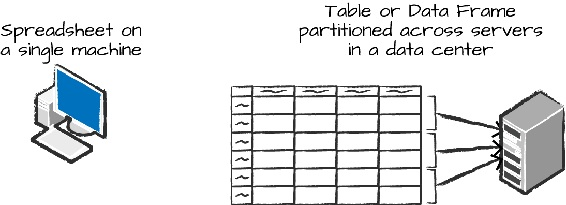

## Partitions in Spark

To enable parallel processing, Spark breaks data into chunks called **partitions**.

A **partition** is a collection of rows that reside on a single physical machine in the cluster.

---

## Key Points

* A DataFrame’s partitions determine **how the data is physically distributed** across the cluster during execution.
* **Parallelism** depends on both the number of partitions and executors:

  * If you have **1 partition**, Spark will have parallelism of only **1**, even with thousands of executors.
  * If you have **many partitions** but only **1 executor**, parallelism is still **1**, since there is only one computation resource.

---

## Important Note

With DataFrames, you usually **do not manipulate partitions manually**. Instead:

* You define **high-level transformations** on the data.
* Spark automatically determines **how the work executes across the cluster**.


# Transformations in Spark

In Spark, the core data structures are **immutable**, meaning they cannot be changed after creation.

This raises the question: *If you cannot change a DataFrame, how do you use it?*

The answer: **transformations**.

---

## What Are Transformations?

To “change” a DataFrame, you **instruct Spark** how to modify it. These instructions are called **transformations**.

### Example: Filter Even Numbers

#### Scala

```scala
val divisBy2 = myRange.where("number % 2 = 0")
```

#### Python

```python
divisBy2 = myRange.where("number % 2 = 0")
```

> Note: These return **no output immediately**. Transformations are **abstract instructions**, and Spark only executes them when an **action** is called.

---

## Types of Transformations

### 1. Narrow Transformations

* Each **input partition contributes to only one output partition**.
* Example: `where` statement in the previous snippet.
* **Benefit:** Spark can **pipeline multiple operations in memory**.

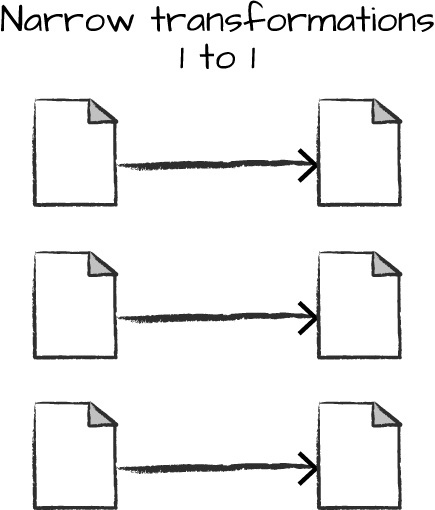

### 2. Wide Transformations

* **Input partitions contribute to many output partitions**.
* Often involves a **shuffle**, where Spark exchanges partitions across the cluster.
* **Drawback:** Spark writes intermediate results to disk, making it slower than narrow transformations.

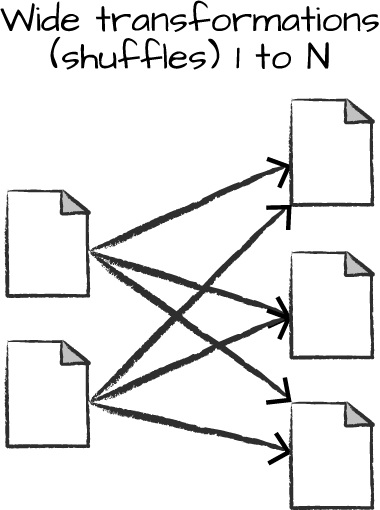

---

## Summary

* Transformations are the **core way to express business logic** in Spark.
* They are classified as **narrow** or **wide**, depending on how partitions contribute to outputs.
* Narrow transformations allow **in-memory pipelining**, while wide transformations often trigger **shuffles**.

Next, you will learn about **lazy evaluation**, which explains why Spark does not execute transformations immediately.


# Lazy Evaluation in Spark

**Lazy evaluation** means that Spark waits until the **last moment** to execute the computation plan.

* When you express an operation on a DataFrame, Spark **does not modify the data immediately**.
* Instead, it **builds a plan of transformations** to apply to the source data.
* This plan is then **compiled into a physical plan** optimized to run efficiently across the cluster.

### Benefits

* Spark can **optimize the entire data flow end-to-end**.
* Example: **Predicate Pushdown**

  * If a filter is applied at the end that only requires a single row, Spark will **push the filter down** to access only the necessary record, saving time and resources.

---

# Actions in Spark

While transformations **define a logical plan**, **actions trigger computation**.

* An **action** instructs Spark to **compute a result** from the transformations.

### Example: Count Action

```scala
// Scala
divisBy2.count()
```

```python
# Python
divisBy2.count()
```

> Output: `500` (total number of records in the DataFrame)

### Types of Actions

1. **View data** in the console (e.g., `show()`)
2. **Collect data** to native objects in the language (e.g., `collect()`)
3. **Write data** to output sources (e.g., `write()`)

### What Happens During an Action

* Spark triggers a **job** that:

  1. Executes narrow transformations (e.g., `filter`)
  2. Executes wide transformations (e.g., `aggregation`)
  3. Collects the result to a native object

* You can **monitor Spark jobs** and see this execution in the **Spark UI**, included with Spark to visualize jobs running on a cluster.
